# Task_02 - Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

#### Step 1: Importing Libraries and Loading the Dataset

#### Step 2: Data Exploration and Cleaning

* Check the first few rows of the dataset to get an overview of the data
* Check for missing data
* Handle missing data (e.g., by filling or dropping rows with missing values).
#### Step 3: Data Analysis

* Survival Rate: Calculate and visualize the overall survival rate.
* Passenger Class Analysis: Analyze the survival rates by passenger class.
* Gender Analysis: Analyze the survival rates by gender.
* Age Analysis: Analyze the survival rates by age groups.
* Fare Analysis: Analyze the fare distribution and its impact on survival.

#### Step 4: Data Visualization

* Age Distribution: Visualize the distribution of passenger ages.
* Fare Distribution: Visualize the distribution of fares.
* Correlation Analysis: Create a heatmap to visualize the correlation between features.

## Step 1: Importing Libraries and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
agn = pd.read_csv('titanic.csv')

## Step 2: Data Exploration and Cleanings).

* Check the first few rows of the dataset to get an overview of the data
* Check for missing data
* Handle missing data (e.g., by filling or dropping rows with missing values).

In [4]:
agn.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [5]:
agn.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Fill missing Values with means
agn.fillna(agn.mean(numeric_only=True),inplace=True)

In [7]:
agn.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Fill non-numeric values
agn['Cabin'] = agn['Cabin'].ffill()
agn['Cabin'] = agn['Cabin'].bfill()
agn['Embarked'] = agn['Embarked'].ffill()
agn['Embarked'] = agn['Embarked'].bfill()

In [9]:
agn.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
agn.dropna()
agn.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


## Step 3: Data Analysis

#### Survival Rate: Calculate and visualize the overall survival rate.

In [11]:
list(agn.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [12]:
agn['Survived'].value_counts() # .plot(kind='bar')

Survived
0    549
1    342
Name: count, dtype: int64

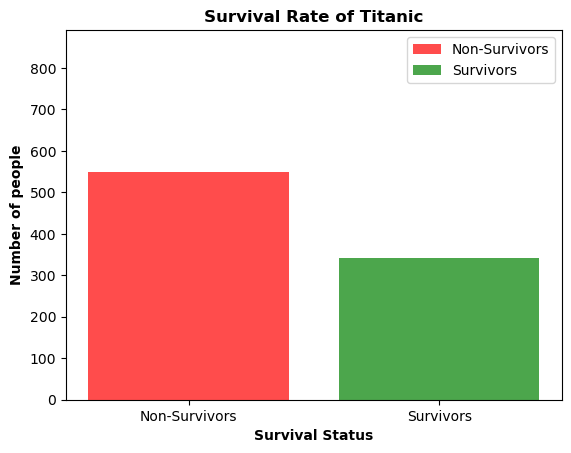

In [13]:
# Plotting the bar chart
plt.bar(['Non-Survivors','Survivors'],agn['Survived'].value_counts(),color=['r','g'],linewidth=0.5,alpha=0.7,label=['Non-Survivors','Survivors'])
plt.xlabel('Survival Status',fontweight='bold')
plt.ylabel('Number of people', fontweight='bold')
plt.title('Survival Rate of Titanic',fontweight='bold')
plt.ylim(0,891)
plt.legend()
plt.show()

#### Passenger Class Analysis: Analyze the survival rates by passenger class.

In [14]:
print(agn['Pclass'].value_counts())
print(agn.groupby("Pclass")["Survived"].sum())
print(agn.groupby("Pclass")["Survived"].mean())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


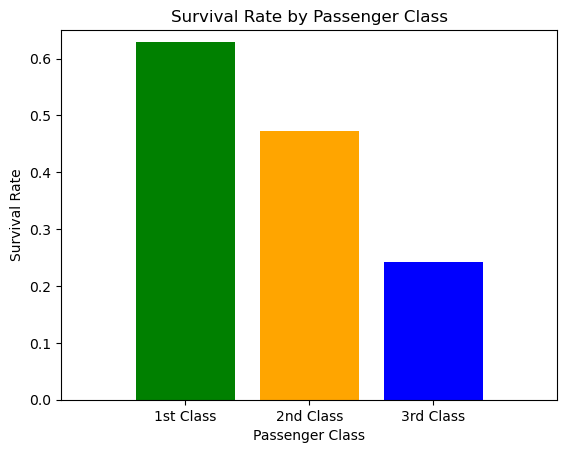

In [15]:
plt.bar(["1st Class","2nd Class","3rd Class"],agn.groupby("Pclass")["Survived"].mean(),color=['g','orange','b'])
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.ylim(0,0.65)
plt.xlim(-1,3)
plt.show()

#### Gender Analysis: Analyze the survival rates by gender.

In [16]:
print(agn['Sex'].value_counts())
print(agn.groupby("Sex")["Survived"].sum())
print(agn.groupby("Sex")["Survived"].mean())

Sex
male      577
female    314
Name: count, dtype: int64
Sex
female    233
male      109
Name: Survived, dtype: int64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


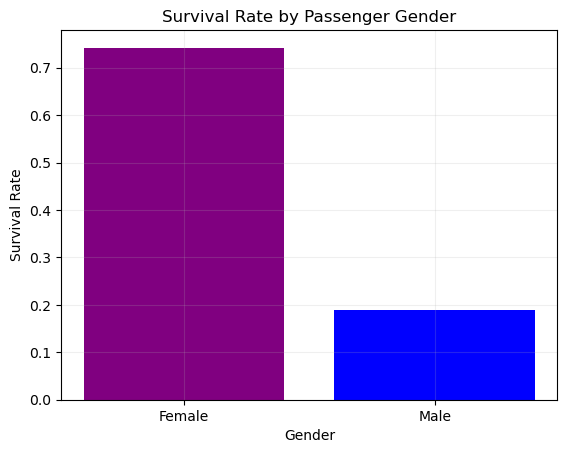

In [17]:
plt.bar(["Female","Male"],agn.groupby("Sex")["Survived"].mean(),color=['purple','b'])
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Gender")
plt.grid(alpha=0.2)
plt.show()

#### Age Analysis: Analyze the survival rates by age groups.

In [18]:
print(agn['Age'].value_counts())
print(agn.groupby("Age")["Survived"].sum())
print(agn.groupby("Age")["Survived"].mean())

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64
Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    0
70.50    0
71.00    0
74.00    0
80.00    1
Name: Survived, Length: 89, dtype: int64
Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 89, dtype: float64


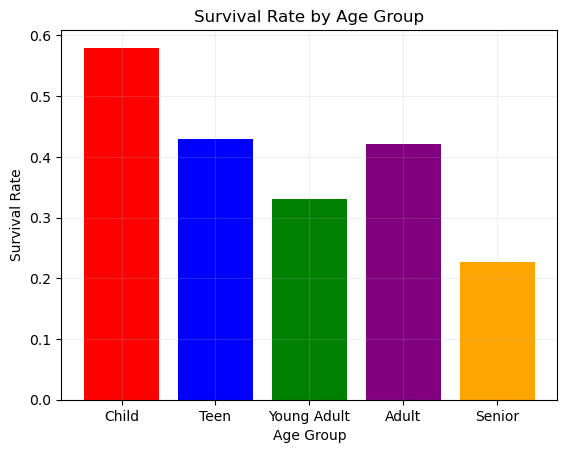

In [19]:
# Define bins for age groups
bins = [0, 12, 18, 30, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create age groups using pd.cut()
agn['Age_Group'] = pd.cut(agn['Age'], bins=bins, labels=labels)

plt.bar(labels,agn.groupby("Age_Group",observed=True)["Survived"].mean(),color=['red', 'blue', 'green', 'purple', 'orange'])
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Age Group")
plt.grid(alpha=0.2)
plt.show()

#### Fare Analysis: Analyze the fare distribution and its impact on survival.

In [20]:
print(agn['Fare'].value_counts())
print(agn.groupby("Fare")["Survived"].sum())
print(agn.groupby("Fare")["Survived"].mean())

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64
Fare
0.0000      1
4.0125      0
5.0000      0
6.2375      0
6.4375      0
           ..
227.5250    3
247.5208    1
262.3750    2
263.0000    2
512.3292    3
Name: Survived, Length: 248, dtype: int64
Fare
0.0000      0.066667
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 248, dtype: float64


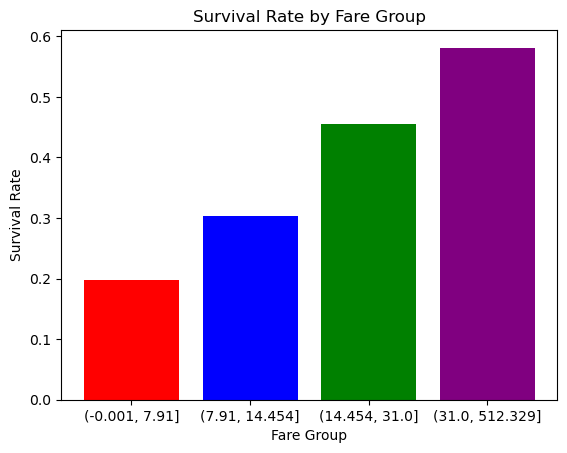

In [21]:
agn['Fare'].describe()
# Survival rate based on fare
agn['FareGroup'] = pd.qcut(agn['Fare'], 4)

# Visualize survival rate by fare group
plt.bar(agn.groupby('FareGroup',observed=True)['Survived'].mean().index.astype(str),agn.groupby('FareGroup',observed=True)['Survived'].mean(),color=['red', 'blue', 'green', 'purple'])
# fare_survival_rate.plot(kind='bar', color='orange')
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.show()

## Step 4: Data Visualizationres.

#### Age Distribution: Visualize the distribution of passenger ages.


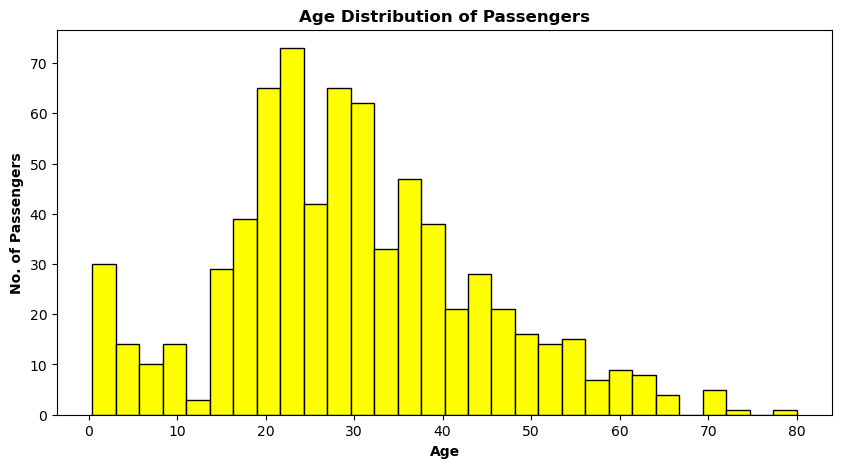

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
aget = pd.read_csv("titanic.csv")
# plot graph of of passengers by age
plt.figure(figsize=(10,5))
plt.hist(aget["Age"].dropna(),bins=30,color="yellow",edgecolor = "black",alpha=1.0)
plt.title("Age Distribution of Passengers",fontweight="bold")
plt.xlabel("Age",fontweight='bold')
plt.ylabel("No. of Passengers",fontweight="bold")
plt.show()

#### Fare Distribution: Visualize the distribution of fares.

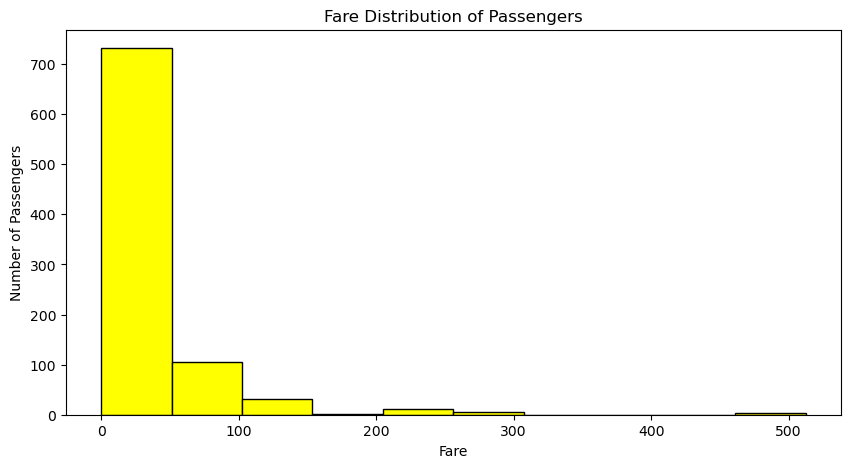

In [23]:
plt.figure(figsize=(10,5))
plt.hist(aget["Fare"].dropna(),bins=10,color="yellow",edgecolor = "black",alpha=1.0)
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.show()

#### Correlation Analysis: Create a heatmap to visualize the correlation between features.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
heat = pd.read_csv('titanic.csv')

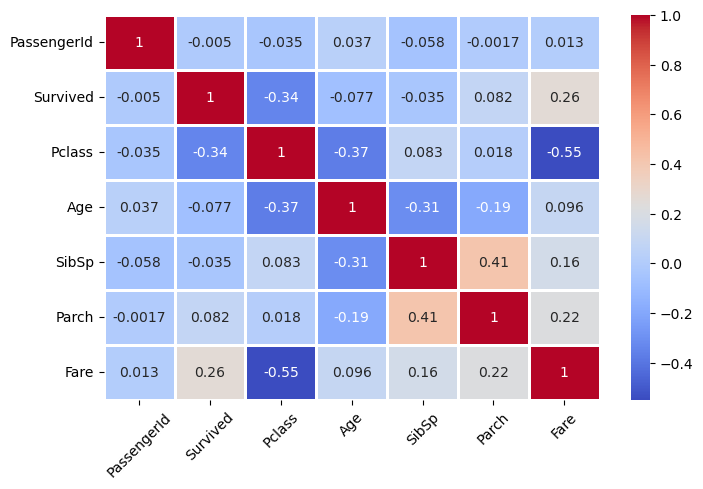

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(heat.corr(numeric_only=True),annot=True,cmap="coolwarm",linewidth=1) # annot puts values inside the boxes
plt.xticks(rotation=45)
plt.show()